In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [44]:
df1 = pd.read_csv('Cars.csv')
df1.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449,10.5,70,US


In [45]:
df = df1.select_dtypes(include=[np.number])

n_clusters = 4

scaler = StandardScaler()
data_std = scaler.fit_transform(df)

# K-Means
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
kmeans_labels = kmeans.fit_predict(data_std)

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(data_std)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_std)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(data_std)

# evaluation metrics
def evaluate_cluster(labels_pred):
    silhouette = metrics.silhouette_score(data_std, labels_pred)
    calinski_harabasz = metrics.calinski_harabasz_score(data_std, labels_pred)
    davies_bouldin = metrics.davies_bouldin_score(data_std, labels_pred)
    
    return silhouette, calinski_harabasz, davies_bouldin

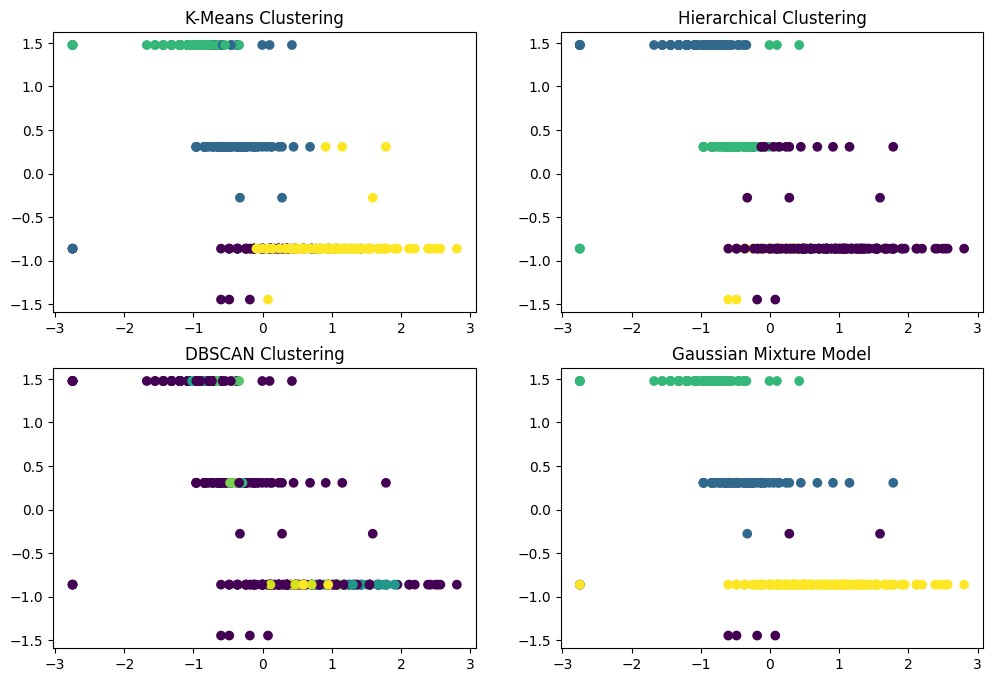

In [46]:
# K-Means
kmeans_metrics = evaluate_cluster(kmeans_labels)

# Hierarchical Clustering
agg_metrics = evaluate_cluster(agg_labels)

# DBSCAN
dbscan_metrics = evaluate_cluster(dbscan_labels)

# Gaussian Mixture Model
gmm_metrics = evaluate_cluster(gmm_labels)

# visualize the clustering results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(data_std[:, 0], data_std[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(2, 2, 2)
plt.scatter(data_std[:, 0], data_std[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(2, 2, 3)
plt.scatter(data_std[:, 0], data_std[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(2, 2, 4)
plt.scatter(data_std[:, 0], data_std[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')

plt.show()

In [47]:
# display results
results_df = pd.DataFrame({
    'Method': ['K-Means', 'Hierarchical Clustering', 'DBSCAN', 'Gaussian Mixture Model'],
    'Silhouette Score': [kmeans_metrics[0], agg_metrics[0], dbscan_metrics[0], gmm_metrics[0]],
    'Calinski-Harabasz Index': [kmeans_metrics[1], agg_metrics[1], dbscan_metrics[1], gmm_metrics[1]],
    'Davies-Bouldin Index': [kmeans_metrics[2], agg_metrics[2], dbscan_metrics[2], gmm_metrics[2]]
})

print(results_df)

                    Method  Silhouette Score  Calinski-Harabasz Index  \
0                  K-Means          0.340733               352.521214   
1  Hierarchical Clustering          0.312203               319.579503   
2                   DBSCAN         -0.335947                 9.312032   
3   Gaussian Mixture Model          0.296289               236.613360   

   Davies-Bouldin Index  
0              1.119195  
1              1.140937  
2              1.968225  
3              2.349825  
